In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
from iterpop import iterpop as ip
import itertools as it
from matplotlib import pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
from dishpylib.pyhelpers import make_outattr_metadata
from dishpylib.pyhelpers import print_runtime


In [3]:
print_runtime()


context: ci
hostname: pkrvm2jjpg2dj4m
interpreter: 3.10.12 (main, Aug 15 2025, 14:32:43) [GCC 11.4.0]
notebook name: bucket=prq49--a=all_stints_all_thread_profiles+endeavor=16--elapsed_updates
notebook path: /home/runner/work/oee4/oee4/binder/bucket=prq49--a=all_stints_all_thread_profiles+endeavor=16--elapsed_updates.ipynb
revision: bdac574
timestamp: 2025-08-29T02:23:36Z00:00

IPython==7.16.1
packaging==25.0


<ipython-input-3-4d790cf6450f>:1: DeprecatedWarning: print_runtime is deprecated. use nbmetalog package instead
  print_runtime()


# get data


In [4]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/thread-profiles/stage=8+what=elaborated/',
)


In [5]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format(hash_pandas_object( df ).sum())
dfdigest


'5766f00a6933dc89'

In [6]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')


In [7]:
df['Normalized Elapsed Updates'] = df['Update'] / df.groupby([
    'Series',
    'Stint',
])['Update'].transform('mean')

df['Elapsed Update Std'] = df.groupby([
    'Series',
    'Stint',
])['Update'].transform('std') / df.groupby([
    'Series',
    'Stint',
])['Update'].transform('mean')

df['Elapsed Update Span'] = (df.groupby([
    'Series',
    'Stint',
])['Update'].transform('max') - df.groupby([
    'Series',
    'Stint',
])['Update'].transform('min')) / df.groupby([
    'Series',
    'Stint',
])['Update'].transform('mean')


# case study series 16005


In [8]:
dfx = df[ df['Series'] == 16005 ]


<ipython-input-9-ec59fbd77b0b>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata()


teeplots/bucket=prq49+endeavor=16+transform=filter-Series-16005+viz=lineplot+x=stint+y=elapsed-update-std+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Series-16005+viz=lineplot+x=stint+y=elapsed-update-std+ext=.png


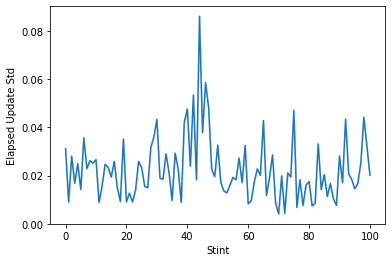

<AxesSubplot:xlabel='Stint', ylabel='Elapsed Update Std'>

In [9]:
tp.tee(
    sns.lineplot,
    data=dfx,
    x='Stint',
    y='Elapsed Update Std',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Series-16005',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata()
    },
)


<ipython-input-10-ba0a0feefee0>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata()


teeplots/bucket=prq49+endeavor=16+transform=filter-Series-16005+viz=lineplot+x=stint+y=elapsed-update-span+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Series-16005+viz=lineplot+x=stint+y=elapsed-update-span+ext=.png


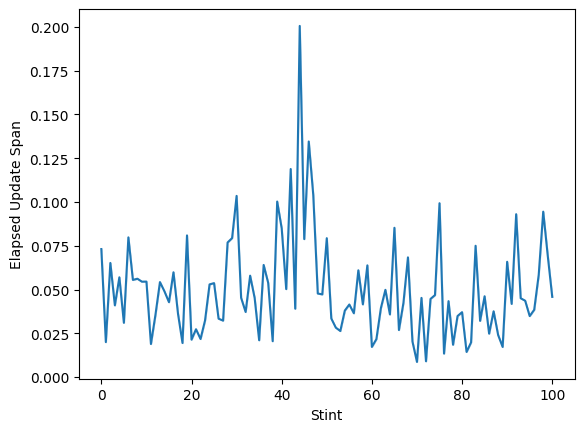

<AxesSubplot:xlabel='Stint', ylabel='Elapsed Update Span'>

In [10]:
tp.tee(
    sns.lineplot,
    data=dfx,
    x='Stint',
    y='Elapsed Update Span',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Series-16005',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata()
    },
)


<ipython-input-11-787e559b772a>:50: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata()
<ipython-input-11-787e559b772a>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


teeplots/bucket=prq49+endeavor=16+hue=stint+transform=filter-Series-16005+viz=boxstrip+x=stint+y=normalized-elapsed-updates+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=stint+transform=filter-Series-16005+viz=boxstrip+x=stint+y=normalized-elapsed-updates+ext=.png


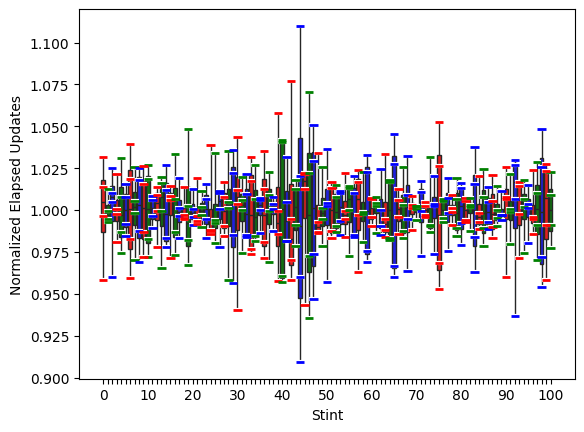

In [11]:
def boxstrip(*args, **kwargs):

    sns.boxplot(
        *args,
        **kwargs,
        whis=(0, 100),
    )
    sns.scatterplot(
        *args,
        **{
            k : v
            for k, v in kwargs.items()
            if k != 'hue'
        },
        marker='_',
        zorder=100,
        linewidth=3,
        color='white',
    )
    sns.scatterplot(
        *args,
        **kwargs,
        marker='_',
        zorder=100,
        linewidth=2,
    )


    plt.gca().get_legend().remove()
    for idx, label in enumerate(plt.gca().xaxis.get_ticklabels()):
        if idx % 10: label.set_visible(False)

tp.tee(
    boxstrip,
    data=dfx,
    x='Stint',
    y='Normalized Elapsed Updates',
    palette=list(it.islice(
        it.cycle(['r','g','b']),
        len(dfx['Stint'].unique())
    )),
    hue='Stint',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Series-16005',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata()
    },

)


In [12]:
print('mean update std', dfx['Elapsed Update Std'].mean())
print('mean update span', dfx['Elapsed Update Span'].mean())


mean update std 0.022585260791035896
mean update span 0.049990232620249056


In [13]:
max_update_std = dfx['Elapsed Update Std'].max()
print(
    'max update std', max_update_std,
    '@ Stint', ip.pophomogeneous(
        dfx[ dfx['Elapsed Update Std'] == max_update_std ]['Stint']
    )
)

max_update_span = dfx['Elapsed Update Span'].max()
print(
    'max update span', max_update_span,
    '@ Stint', ip.pophomogeneous(
        dfx[ dfx['Elapsed Update Span'] == max_update_span ]['Stint']
    )
)


max update std 0.08621807775514276 @ Stint 44
max update span 0.20057157703299558 @ Stint 44
